# Modelling Latency

## Import Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from itertools import accumulate

## Generate Data

       Bytes            SourceIP       ICMPSeq       TTL           Time  TimeFiltered  ICMPSeqFiltered
0   64 bytes   from 192.168.4.2:    icmp_seq=1   ttl=255   time=1042 ms        1042.0                1
1   64 bytes   from 192.168.4.2:    icmp_seq=2   ttl=255   time=40.0 ms          40.0                2
2   64 bytes   from 192.168.4.2:    icmp_seq=3   ttl=255   time=14.0 ms          14.0                3
3   64 bytes   from 192.168.4.2:    icmp_seq=4   ttl=255   time=13.0 ms          13.0                4
4   64 bytes   from 192.168.4.2:    icmp_seq=5   ttl=255   time=17.1 ms          17.1                5
5   64 bytes   from 192.168.4.2:    icmp_seq=6   ttl=255   time=16.1 ms          16.1                6
6   64 bytes   from 192.168.4.2:    icmp_seq=7   ttl=255   time=15.0 ms          15.0                7
7   64 bytes   from 192.168.4.2:    icmp_seq=8   ttl=255   time=14.1 ms          14.1                8
8   64 bytes   from 192.168.4.2:    icmp_seq=9   ttl=255   time=13.4 ms  

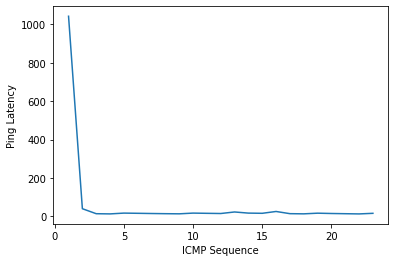

In [8]:
# df = pd.DataFrame()
# df['x1'] = np.random.uniform(-1,1, size=1000)
# df['x2'] = df['x1'] + np.random.uniform(-1,1, size=1000)
# df['x3'] = df['x2'] + np.random.uniform(-1,1, size=1000)
# df['x4'] = df['x3'] + np.random.uniform(-1, 1, size=1000)

columnNames = ['Bytes', 'SourceIP', 'ICMPSeq', 'TTL', 'Time']
# df = pd.read_csv('endtoend1.csv', on_bad_lines='skip', usecols=columns)
df = pd.read_csv('endtoend1.csv', names=columnNames)
# print(df.to_string())

# Filtering data
# To extract all latencies in float eliminating any string
df['TimeFiltered'] = df['Time'].str.extract(r'(\d+.\d+)').astype('float')
df['ICMPSeqFiltered'] = df['ICMPSeq'].str.extract(r'(\d+)').astype('int')

# Printing the resultant filtered data
print(df.to_string())

# Initial Plot
plt.plot(df.ICMPSeqFiltered, df.TimeFiltered)
plt.title("Ping Latency vs ICMP Sequence")
plt.xlabel('ICMP Sequence')
plt.ylabel('Ping Latency')
fig = plt.gcf()
plt.show()
# Saving the plot in mentoned file path
fig.savefig('./plots/LineGraph-PingLatencyVSICMPSequence.png', dpi=100, facecolor='white', transparent=False)

## Start Plot

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

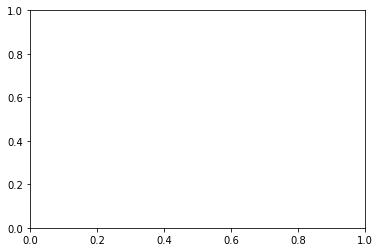

In [3]:
fig,ax = plt.subplots()

for col in df.columns:

  # SKIP IF IT HAS ANY INFINITE VALUES
  if not all(np.isfinite(df[col].values)):
    continue

  # USE numpy's HISTOGRAM FUNCTION TO COMPUTE BINS
  xh, xb = np.histogram(df[col], bins=60, normed=True)

  # COMPUTE THE CUMULATIVE SUM WITH accumulate
  xh = list(accumulate(xh))
  # NORMALIZE THE RESULT
  xh = np.array(xh) / max(xh)

  # PLOT WITH LABEL
  ax.plot(xb[1:], xh, label=f"$CDF$({col})")
ax.legend()
plt.title("CDFs of Columns")
plt.show()